In [1]:
from detector import *
from cnn_block import *
from preprocess import *
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
detector = FaceDetector()

In [3]:
preprocessor = Preprocessor()

In [4]:
cnn_block = CnnBlock()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
cnn_block.load()

In [6]:
def encode_person(list):
    d = []
    for img in list:
        d.append(cnn_block.encode_image(img))
    return d

In [7]:
#return vectors in one folder
def get_database(img_db):
    dic = {}
    for name, pics in img_db.items():
        dic[name] = encode_person(pics)
    return dic

In [8]:
img_db = preprocessor.get_database()
database = get_database(img_db)

In [9]:
def dist_func(a, b):
    return np.linalg.norm(a - b)

In [10]:
def dist_person(img_path, identity):
    vecs = database[identity]
    enc = cnn_block.encode_image( preprocessor.process(img_path)[0])
    dist = 0
    mi = 1
    for ve in vecs:
        dist += dist_func(enc, ve)
        mi = min(mi, dist_func(enc,ve))
    dist /= len(vecs)
    return mi, dist

In [11]:
dic = []
for name, lis in database.items():
    for v in lis:
        l= {}
        l["z"] = name
        #l["vec"] = v[0]
        for i in range(128):
            l[str(i)] = v[0][i]
        dic.append(l)

In [12]:
df = pd.DataFrame(dic)

In [13]:
embedded = np.zeros((len(df), 128))
ind = 0
for name, lis in database.items():
    print(name, end=" ")
    print(len(lis))
    for v in lis:
        embedded[ind] = v
        ind+=1

justin 15
musk 18
shawn 21
trump 21
Vladimir_Putin 18


In [14]:
len(embedded[0])

128

In [15]:
df

,0,1,10,100,101,102,103,104,105,106,...,91,92,93,94,95,96,97,98,99,z
0,-0.005511,0.192175,0.090382,-0.038968,0.055476,-0.075439,0.171716,-0.107079,0.135124,-0.021195,...,-0.132009,-0.012213,0.071880,0.016038,-0.031448,0.053776,0.118742,0.018122,-0.049018,justin
1,0.017576,0.098062,0.089943,-0.003196,0.066449,-0.071545,0.139423,-0.137824,0.132948,-0.066894,...,-0.206203,-0.010893,0.063344,-0.094233,-0.034214,0.042402,0.027566,0.061630,-0.021563,justin
2,0.101790,0.124506,0.124292,0.043086,0.087574,-0.051120,0.104849,-0.130774,0.140883,-0.005857,...,-0.215685,-0.091234,0.105897,-0.080507,-0.050784,0.014374,0.030590,0.013923,-0.038130,justin
3,0.090332,0.032679,0.092602,0.090312,0.131600,-0.037103,0.102031,-0.136336,0.088413,-0.093079,...,-0.223636,0.008935,0.053576,-0.087134,-0.104161,0.021758,-0.011636,0.071102,-0.109121,justin
4,0.065910,0.074543,0.091234,0.019081,0.111098,-0.024148,0.139232,-0.131877,0.022648,-0.103454,...,-0.195258,-0.029603,-0.006986,-0.057859,-0.091944,0.045120,-0.003819,0.124678,-0.098272,justin
5,0.077216,0.020029,0.124083,0.036182,0.093923,-0.037412,0.117034,-0.066022,0.108044,-0.046913,...,-0.198127,0.003979,0.078186,-0.110309,-0.150539,-0.000813,0.040057,0.072574,-0.104315,justin
6,0.045821,0.148305,0.103700,0.029205,0.100571,-0.094513,0.074200,-0.164781,0.174506,-0.047422,...,-0.151905,0.003556,0.101123,-0.088913,-0.036372,0.040136,0.029419,0.120068,-0.017959,justin
7,0.022121,0.136702,0.113974,0.043977,0.122520,-0.083274,0.115297,-0.184018,0.128475,-0.093239,...,-0.160628,0.044776,0.107952,-0.079181,-0.067265,0.082965,-0.044201,0.146642,-0.032353,justin
8,0.077055,0.107154,0.056388,0.054374,0.070777,-0.048011,0.083658,-0.075438,0.103989,-0.000701,...,-0.114497,-0.030185,-0.006264,-0.150451,-0.060672,0.042647,0.075984,0.011378,-0.024467,justin
9,0.104436,0.066267,0.082794,0.090269,0.159001,-0.082117,0.101599,-0.111572,0.080411,-0.073390,...,-0.251430,-0.023047,0.090626,-0.107465,-0.028290,0.007374,0.026944,0.041241,-0.044327,justin


In [16]:
metadata = np.array(df)

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


targets = np.array([m[128] for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

"""
# Numerical encoding of identities
y = encoder.transform(targets)
train_idx = np.arange(metadata.shape[0]) % 3 != 0
test_idx = np.arange(metadata.shape[0]) % 3 == 0

# 50 train examples of 10 identities (5 examples each)
X_train = embedded[train_idx]
# 50 test examples of 10 identities (5 examples each)
X_test = embedded[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]"""

X_train, X_test, y_train, y_test = train_test_split(embedded, targets, random_state=70)

svc = LinearSVC()
svc.fit(X_train, y_train)
acc_svc = accuracy_score(y_test, svc.predict(X_test))


#print(f'SVM accuracy: ',acc_svc)

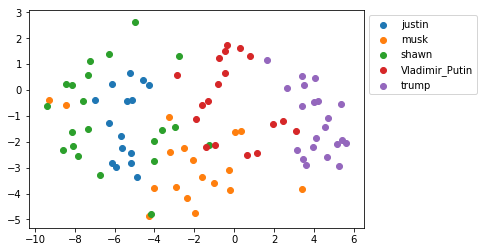

In [29]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(embedded)

for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('plot.png')

In [30]:
def Test_who(path, pri = True):
    #get vec
    ar = preprocessor.process(path)[0]
    emb = cnn_block.encode_image(ar)[0]
    
    #predict
    example_prediction = svc.predict([emb])[0]
    
    #plot
    if pri:
        f, axarr = plt.subplots(1,2)
        axarr[0].imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
        axarr[1].imshow(cv2.cvtColor(ar, cv2.COLOR_BGR2RGB))
        plt.savefig('ex.png')
    
    return example_prediction

'justin'

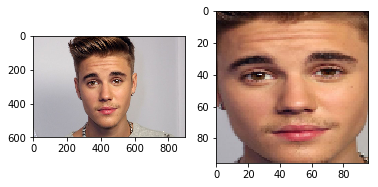

In [35]:
# test_name.jpg
path = "test_justin.jpg"
Test_who(path)